# ASSIGNMENT - 4
# PRAJAKTA KAPRE
# 22103040

**Assignment: Gaussian Naive Bayes for Titanic Survival Prediction**

Instructions:

You are required to write Python code to solve the given problems.

Use the scikit-learn library for implementing Gaussian Naive Bayes.

Comment your code appropriately for better understanding.

Submit the Python script with the completed code.

1. Load the "Titanic" dataset using pandas and explore its structure and contents. Show the result.
2. Perform data preprocessing tasks such as handling missing values, feature selection, and feature encoding. Consider using techniques like imputation for missing values and one-hot encoding for categorical variables.
3. Split the dataset into training and testing sets.

*Use 7x% of the data for training and (100 - 7x)% for testing.*

**[x = 2nd last digit of your roll number]**

*comment your roll number and 2nd last digit*

4. Implement Gaussian Naive Bayes using the training set. Train the model on the selected features and the corresponding target variable (Survived).
5. Apply the trained model to make predictions on the testing set.
6. Evaluate the performance of the Gaussian Naive Bayes model by calculating metrics such as accuracy, precision, recall, and F1-score. Interpret the results and analyze the model's effectiveness. (Be creative here)
7. Any chart that you want to implement , do it (Bonus)

## IMPORTING LIBRARIES

In [1]:
import pandas as pd

## LOADING DATA

In [2]:
df = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## DATA PRE-PROCESSING

### 1. Removing missing values

In [4]:
# Checking null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#  Dropping the  rows from df where any of the values are missing or NaN.

# df.dropna(axis=0,how='any',inplace=True)  # axis=0 for row wise elimination
# df.shape

In [6]:
df = df.drop('Cabin', axis=1)

### As we can see that most of the missing values are from Cabin column and after removing the missing values the total number of data points remained are only 183, so we will not consider cabin as a feature

In [7]:
df.shape

(891, 11)

### Imputation of missing values of age column

In [8]:
# Fill missing values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
df.dropna(axis=0,how='any',inplace=True)  # axis=0 for row wise elimination
df.shape

(889, 11)

### 2. Removing duplicate values

In [10]:
df[df.duplicated(['Name', 'Sex', 'Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### There are no duplicate values

## 3. One hot encoding for categorical features such as 'Age' and 'Embarked'

In [11]:
# Perform one-hot encoding on 'Embarked' column
df_encoded = pd.get_dummies(df, columns=['Embarked'])

# Perform one-hot encoding on 'Sex' column
df_encoded = pd.get_dummies(df_encoded, columns=['Sex'])
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1


In [12]:
df_encoded.shape

(889, 14)

### Train-Test split
#### Roll number is 22103040, so Train:test = 74:26

In [17]:
X= df_encoded[['Pclass', 'Age', 'SibSp', 'Parch','Fare','Embarked_C','Embarked_Q','Embarked_S','Sex_female','Sex_male']]
y=df_encoded.Survived
X.shape,y.shape

((889, 10), (889,))

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26)

# Gaussian Naive-Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [20]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       140
           1       0.76      0.77      0.77        92

    accuracy                           0.81       232
   macro avg       0.81      0.81      0.81       232
weighted avg       0.82      0.81      0.81       232



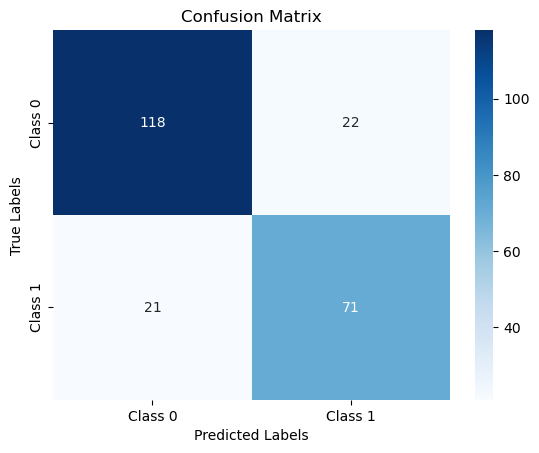

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and color bar
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# plt.colorbar()

# Display the confusion matrix
plt.show()


## CLASS 0 - NOT SURVIVED
## CLASS 1 - SURVIVED

In [41]:
y_pred


,0
0,0
1,0
2,0
3,0
4,0
...,...
227,0
228,1
229,1
230,1
